In [7]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# 보스턴 집갓 데이터 셋

In [8]:
boston = datasets.load_boston()

In [9]:
x = boston.data
y = boston.target

# pd.DataFrame(y, columns=['label'])
# pd.DataFrame(x, columns=boston.feature_names)
boston_raw_data = pd.concat([pd.DataFrame(y, columns=['label']), pd.DataFrame(x, columns=boston.feature_names)], axis=1)

In [10]:
boston_raw_data

,label,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
boston_raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


### 1978년도 보스턴 주택 가격
- 506개 타운의 주택 가격의 중앙값(단위: 1,000달러)

### feature
- crim: 범죄율
- indus: 비소매상업지역 면적 비율
- nox: 일산화질소 농도
- rm: 주택당 방의 갯수
- lstat: 인구 중 하위 계층 비율
- b: 인구 중 흑인 비율
- ptratio: 학생/교사 비율
- zn: 25,000 평방피트를 초과 거주지역 비율
- chas: 찰스강의 경계에 위치한 경우 1, 아니면 0 (한강뷰)
- age: 1940년 이전에 건축된 주택의 비율(건물의 노후화)
- rad: 방사형 고속도로까지의 거리
- dis: 직업센터의 거리 
- tax: 재산세율

# 1. 단순선형회귀 분석
- 입력변수 x와 반응변수 y 사이에 선형적인 관계를 가정 한다는 뜻
- 반응변수 y는 레이블이 됩니다. 
- 입력변수 x는 단일변수가 됩니다. (범죄율, 하위계층의 비율, 방의 갯수, ... )
    - 예를 들면 야구선수(용병)들 보면 국내의 치안환경을 굉장히 높게 평가

In [12]:
crime = boston_raw_data['CRIM']
crime = sm.add_constant(crime, has_constant='add') # y-interceot, beta0

In [13]:
crime

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [14]:
boston_crime_model = sm.OLS(boston_raw_data['label'], crime).fit()

In [15]:
boston_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.17e-19
Time:                        01:07:41   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. 범죄율과 집값 사이의 관계를 그림으로 확인 

In [16]:
# 학습셋과 검증셋을 따로 분리되지 않았기 때문에... 
# 학습셋에 대한 정확도를 보는거죠

crime_predict = boston_crime_model.predict(crime)

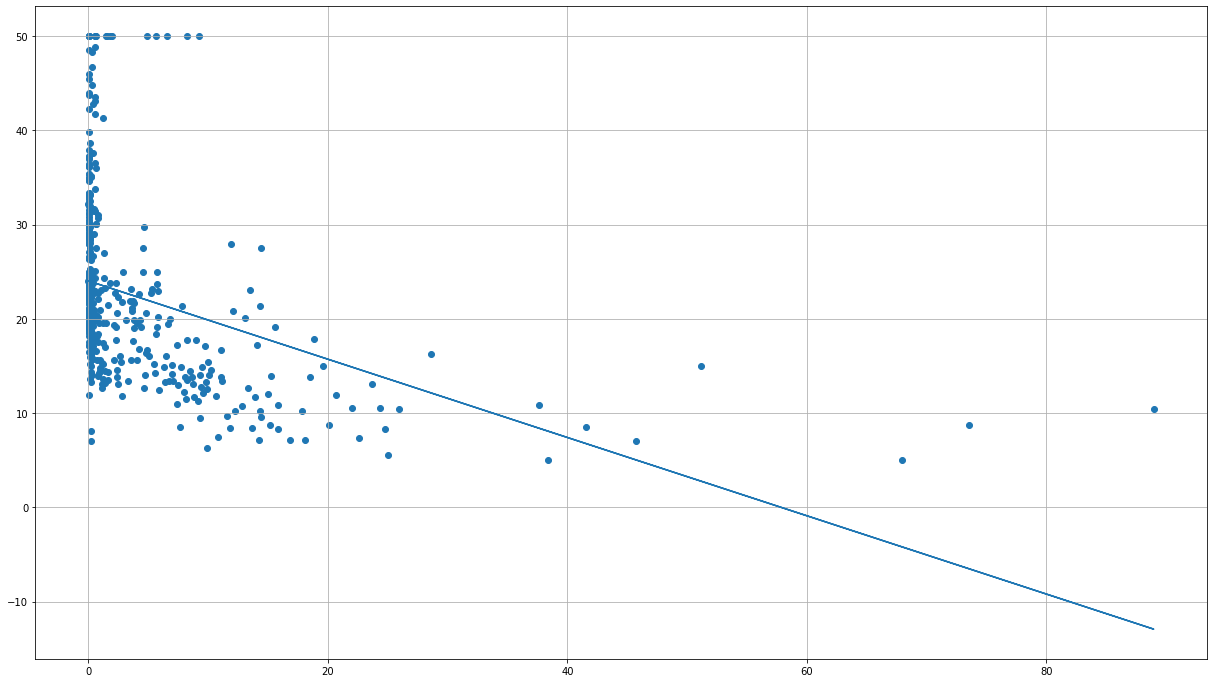

In [18]:
plt.figure(figsize=(21,12))
plt.scatter(crime['CRIM'], boston_raw_data['label'])
plt.plot(crime['CRIM'], crime_predict)
plt.grid()
plt.show()

## 2. 오차항(잔차)
$$
    f(x) = \beta_0 + \beta_1x_1 + \epsilon
$$

- 오차는 정규분포임을 가정 
- 오차가 정규분포임을 가정한다는 건 랜덤하다는 뜻으로 예측 불가능

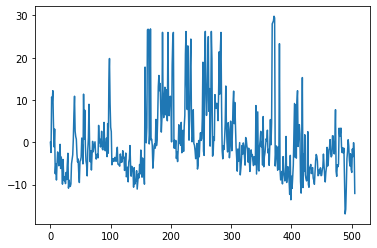

In [14]:
boston_crime_model.resid.plot()
plt.show()

## 3.rm(방의 갯수)과 lstat(하위계층의 비율)
- 각각 단순선형회귀분석 적합 해봅시다. 
- rm과 집값(label)
- lstat와 집값(label)

In [19]:
rm = boston_raw_data['RM']
lstat = boston_raw_data['LSTAT']

rm = sm.add_constant(rm, has_constant='add')
lstat = sm.add_constant(lstat, has_constant='add')

In [20]:
boston_rm_model = sm.OLS(boston_raw_data['label'], rm).fit()
boston_lstat_model = sm.OLS(boston_raw_data['label'], lstat).fit()

In [21]:
boston_rm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.49e-74
Time:                        01:37:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
rm_predict = boston_rm_model.predict(rm)

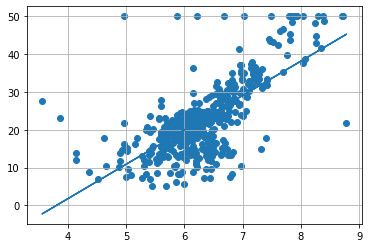

In [23]:
plt.scatter(rm['RM'], boston_raw_data['label'])
plt.plot(rm['RM'], rm_predict)
plt.grid()
plt.show()

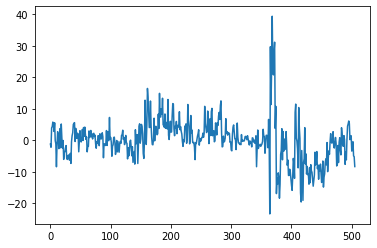

In [24]:
boston_rm_model.resid.plot()
plt.show()

In [25]:
boston_lstat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        01:40:34   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lstat_predict = boston_lstat_model.predict(lstat)

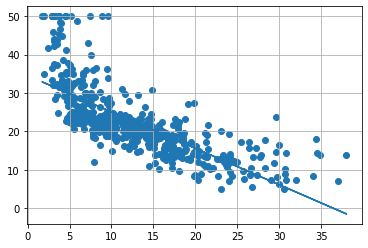

In [28]:
plt.scatter(lstat['LSTAT'], boston_raw_data['label'])
plt.plot(lstat['LSTAT'], lstat_predict)
plt.grid()
plt.show()

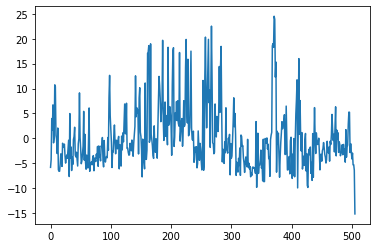

In [29]:
boston_lstat_model.resid.plot()
plt.show()

## 4. ptratio(학생/교사 비율)과 집값 사이의 관계 확인
- ptratio에 대해서 단순선형회귀모형을 적합
    - $\beta_0$와 $\beta_1$을 추정
- 예측된 값($\hat Y$) 주어진 자료의 값($Y$)와의 관계를 산점도로 확인

In [43]:
#TODO

# 2. 다항회귀 분석
- non-linear Regression
- 비선형회귀

In [72]:
lstat = boston_raw_data['LSTAT']
lstat = sm.add_constant(lstat, has_constant='add')
lstat['LSTAT^2'] = (lstat['LSTAT'])**2
lstat['LSTAT^3'] = (lstat['LSTAT'])**3
lstat['LSTAT^4'] = (lstat['LSTAT'])**4
lstat

,const,LSTAT,LSTAT^2,LSTAT^3,LSTAT^4
0,1.0,4.98,24.8004,123.505992,615.059840
1,1.0,9.14,83.5396,763.551944,6978.864768
2,1.0,4.03,16.2409,65.450827,263.766833
3,1.0,2.94,8.6436,25.412184,74.711821
4,1.0,5.33,28.4089,151.419437,807.065599
...,...,...,...,...,...
501,1.0,9.67,93.5089,904.231063,8743.914379
502,1.0,9.08,82.4464,748.613312,6797.408873
503,1.0,5.64,31.8096,179.406144,1011.850652
504,1.0,6.48,41.9904,272.097792,1763.193692


In [73]:
boston_lstat_non_linear_model = sm.OLS(boston_raw_data['label'], lstat).fit()

In [74]:
boston_lstat_non_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     257.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.16e-120
Time:                        03:10:52   Log-Likelihood:                -1557.4
No. Observations:                 506   AIC:                             3125.
Df Residuals:                     501   BIC:                             3146.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.3100      2.280     25.134      0.000      52.830      61.790
LSTAT         -7.0285      0.731     -9.618      0.000      -8.464      -5.593
LSTAT^2        0.4955      0.075      6.616      0.000       0.348       0.643
LSTAT^3       -0.0163      0.003     -5.448      0.000      -0.022      -0.010
LSTAT^4        0.0002   4.04e-05      4.820      0.000       0.000       0.000
==============================================================================
Omnibus:                      128.764   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.790
Skew:                           1.197   Prob(JB):                     6.20e-85
Kurtosis:                       6.558   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
boston_lstat_non_linear_model.params

const      57.309955
LSTAT      -7.028460
LSTAT^2     0.495481
LSTAT^3    -0.016310
LSTAT^4     0.000195
dtype: float64

In [76]:
x = np.linspace(0, 40, 1000)

In [77]:
def f(beta):
    return beta[0] + beta[1] * x + beta[2] * (x**2) + beta[3] * (x**3) + beta[4] * (x**4)

In [100]:
lstat.shape

(506, 5)

In [122]:
coef = np.polyfit(lstat['LSTAT'], boston_raw_data['label'], 2)
non_linear_function = np.poly1d(coef)

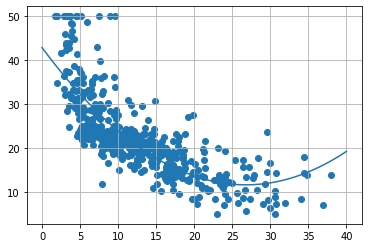

In [124]:
plt.scatter(lstat['LSTAT'], boston_raw_data['label'])
# plt.plot(x, f(boston_lstat_non_linear_model.params))
plt.plot(x, non_linear_function(x))
plt.grid()
plt.show()

# 3.다중선형회귀분석 실습
- crime, rm, lstat

In [30]:
multi = boston_raw_data[['CRIM', 'RM', 'LSTAT']]
multi = sm.add_constant(multi, has_constant='add')
target = boston_raw_data['label']

In [31]:
boston_multi_model = sm.OLS(target, multi).fit()

In [32]:
boston_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.01e-112
Time:                        01:53:20   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
boston_lstat_model.params

const    34.553841
LSTAT    -0.950049
dtype: float64

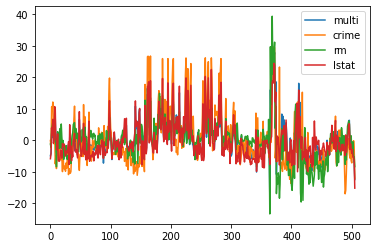

In [29]:
boston_multi_model.resid.plot(label='multi')
boston_crime_model.resid.plot(label='crime')
boston_rm_model.resid.plot(label='rm')
boston_lstat_model.resid.plot(label='lstat')
plt.legend()
plt.show()

- 전체 변수를 이용한 모델

In [34]:
full = boston_raw_data.iloc[:,1:]
full = sm.add_constant(full, has_constant='add')
target = boston_raw_data['label']

In [35]:
boston_full_model = sm.OLS(target, full).fit()

In [36]:
boston_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        02:14:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

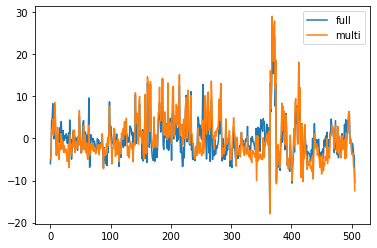

In [37]:
boston_full_model.resid.plot(label='full')
boston_multi_model.resid.plot(label='multi')
plt.legend()
plt.show()

# 4.다중공선성 확인

## 1.상관계수를 통한 다중공선성 확인 

In [40]:
full.corr().style.background_gradient().set_precision(2)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CRIM,nan,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,nan,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,nan,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,nan,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,nan,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,nan,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,nan,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,nan,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,nan,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49


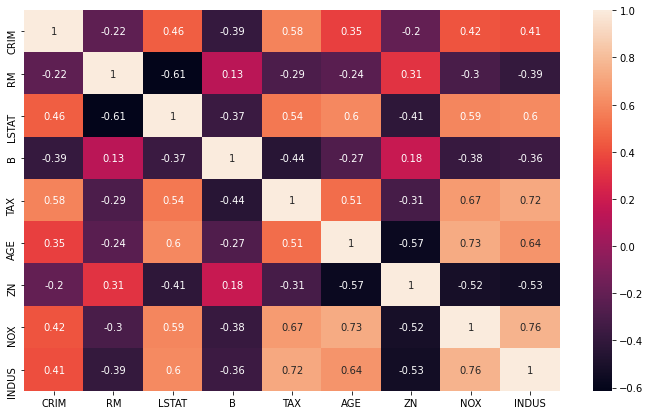

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(full[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']].corr(), annot=True)
plt.show()

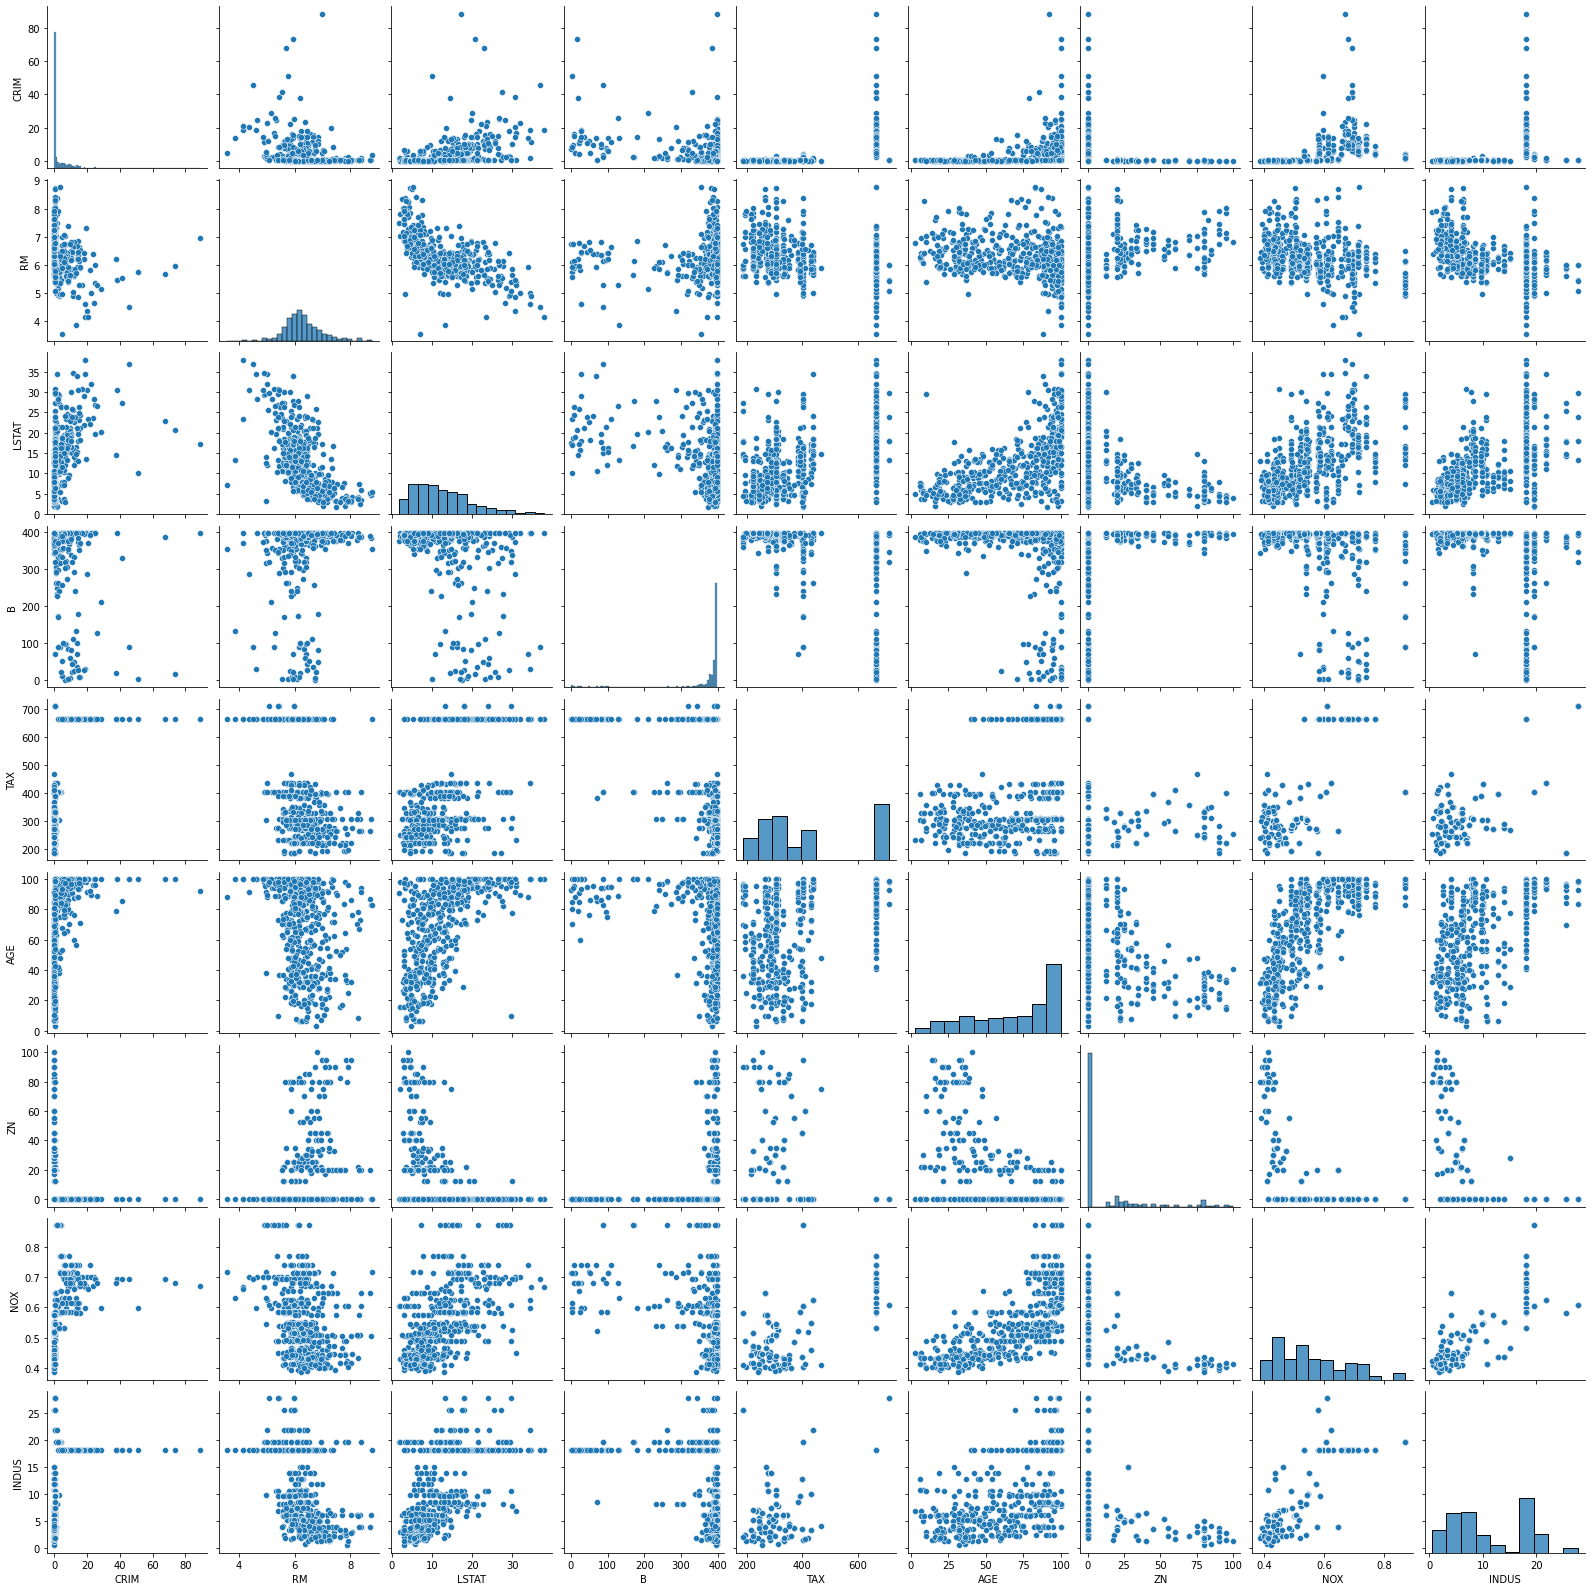

In [42]:
sns.pairplot(full[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']])
plt.show()

## 2. VIF를 통한 다중공선성 확인 

In [140]:
vif = pd.DataFrame()
vif_data = full.drop(['const', 'PTRATIO', 'NOX', 'TAX', 'RM', 'AGE'], axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    vif_data.values, i) for i in range(vif_data.shape[1])
]
vif['features'] = vif_data.columns

In [139]:
vif

,VIF Factor,features
0,2.095211,CRIM
1,2.313889,ZN
2,8.205465,INDUS
3,1.106350,CHAS
4,8.209371,DIS
5,4.689836,RAD
6,10.074224,B
7,6.856889,LSTAT


In [141]:
vif_data = sm.add_constant(vif_data, has_constant='add')
boston_vif_model = sm.OLS(target, vif_data).fit()

In [142]:
boston_vif_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.35e-104
Time:                        03:39:26   Log-Likelihood:                -1583.1
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     497   BIC:                             3222.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8647      1.788     22.298      0.000      36.352      43.377
CRIM          -0.1039      0.039     -2.696      0.007      -0.180      -0.028
ZN             0.0913      0.015      6.277      0.000       0.063       0.120
INDUS         -0.2940      0.060     -4.925      0.000      -0.411      -0.177
CHAS           4.1251      0.994      4.151      0.000       2.173       6.078
DIS           -1.8196      0.195     -9.344      0.000      -2.202      -1.437
RAD            0.0269      0.043      0.633      0.527      -0.057       0.111
B              0.0065      0.003      2.082      0.038       0.000       0.013
LSTAT         -0.8437      0.047    -18.069      0.000      -0.935      -0.752
==============================================================================
Omnibus:                      123.569   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.954
Skew:                           1.302   Prob(JB):                     7.95e-58
Kurtosis:                       5.385   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3. 훈련(train)자료와 검증(test)자료

In [144]:
x = full
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(404, 14) (102, 14) (404,) (102,)


In [145]:
boston_full_train_model = sm.OLS(train_y, train_x).fit()

In [146]:
boston_full_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.10
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.19e-100
Time:                        03:45:32   Log-Likelihood:                -1197.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     390   BIC:                             2478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7372      5.822      7.856      0.000      34.291      57.183
CRIM          -0.1020      0.038     -2.658      0.008      -0.178      -0.027
ZN             0.0601      0.015      3.895      0.000       0.030       0.090
INDUS          0.0348      0.071      0.490      0.624      -0.105       0.174
CHAS           3.0035      0.952      3.155      0.002       1.132       4.875
NOX          -20.4147      4.291     -4.758      0.000     -28.851     -11.979
RM             2.8937      0.472      6.136      0.000       1.966       3.821
AGE           -0.0053      0.015     -0.350      0.727      -0.035       0.025
DIS           -1.7626      0.242     -7.292      0.000      -2.238      -1.287
RAD            0.3389      0.076      4.435      0.000       0.189       0.489
TAX           -0.0135      0.004     -3.056      0.002      -0.022      -0.005
PTRATIO       -1.0192      0.148     -6.897      0.000      -1.310      -0.729
B              0.0104      0.003      3.500      0.001       0.005       0.016
LSTAT         -0.5257      0.055     -9.616      0.000      -0.633      -0.418
==============================================================================
Omnibus:                      150.919   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.360
Skew:                           1.590   Prob(JB):                    6.64e-144
Kurtosis:                       8.391   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

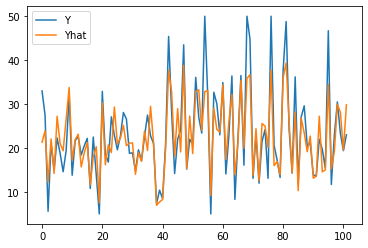

In [147]:
full_train_predict = boston_full_train_model.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(full_train_predict), label='Yhat')
plt.legend()
plt.show()

In [149]:
x = vif_data
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(404, 9) (102, 9) (404,) (102,)


In [150]:
boston_vif_train_model = sm.OLS(train_y, train_x).fit()

In [151]:
boston_vif_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     86.71
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           3.81e-82
Time:                        03:48:16   Log-Likelihood:                -1253.0
No. Observations:                 404   AIC:                             2524.
Df Residuals:                     395   BIC:                             2560.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9726      1.962     19.352      0.000      34.115      41.830
CRIM          -0.0945      0.044     -2.163      0.031      -0.180      -0.009
ZN             0.1047      0.016      6.676      0.000       0.074       0.135
INDUS         -0.2763      0.066     -4.201      0.000      -0.406      -0.147
CHAS           4.6637      1.062      4.390      0.000       2.575       6.752
DIS           -1.8163      0.225     -8.078      0.000      -2.258      -1.374
RAD            0.0322      0.046      0.698      0.486      -0.058       0.123
B              0.0081      0.003      2.427      0.016       0.002       0.015
LSTAT         -0.7863      0.049    -15.976      0.000      -0.883      -0.689
==============================================================================
Omnibus:                      108.367   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.062
Skew:                           1.332   Prob(JB):                     2.05e-57
Kurtosis:                       5.899   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

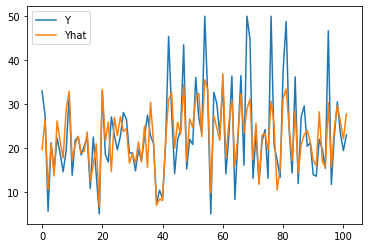

In [152]:
vif_train_predict = boston_vif_train_model.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(vif_train_predict), label='Yhat')
plt.legend()
plt.show()

## 4. 모형에 대한 평가

In [160]:
x = full
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
print( mean_squared_error(y_true=test_y, y_pred=boston_full_train_model.predict(test_x)) )
print( mean_absolute_error(y_true=test_y, y_pred=boston_full_train_model.predict(test_x)) )
print( r2_score(y_true=test_y, y_pred=boston_full_train_model.predict(test_x)))

23.964571384956887
3.5789349138336157
0.7665382927362872


In [161]:
x = vif_data
y = target

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)
print( mean_squared_error(y_true=test_y, y_pred=boston_vif_train_model.predict(test_x)) )
print( mean_absolute_error(y_true=test_y, y_pred=boston_vif_train_model.predict(test_x)) )
print( r2_score(y_true=test_y, y_pred=boston_vif_train_model.predict(test_x)))

38.11698411881064
4.411231872920806
0.6286661653499308
